## TASK 3.1P
* **Name :** M.Rachel
* **Student No. :** 224234147
* **Deakin Mail :** s224234147@deakin.edu.au
* **Email Address:** rachelriney1608@gmail.com

## PROBLEM STATEMENT

This Real Estate valuation dataset is collected from Sindian District, New Taipei City, Taiwan. It is a regression problem with no missing values. The purpose of this study is to propose an innovative real estate valuation approach called Quantitative Comparative Approach, which can estimate correction coefficients to overcome the shortcomings of subjective decisions of correction coefficients of traditional comparative approach. 

#### 1. Download and read the "Real estate valuation data set.xlsx" dataset. You can find the description of the features and targets on the UCI repository website.

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df= pd.read_excel("F:/Data Science/Datasets/Real estate valuation data set.xlsx")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
#Summary of the data
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


* From the summary of the data we found there is no missing values
* Transaction date needs to be treated as proper date format
* There seems to be light skewness in latitude and longitude.

In [7]:
#Find null values
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

So it shows there is no Null values.

In [8]:
#renaming the columns
d = df.rename(columns={'X1 transaction date':'Transaction_Date',
                       'X2 house age':'House_Age',
                       'X3 distance to the nearest MRT station':'Distance_Nearest_MRT_Station',
                       'X4 number of convenience stores':'Num_of_Convenience_Stores',
                       'X5 latitude':'latitude',
                       'X6 longitude':'longitude',
                       'Y house price of unit area':'House_Price_unit_area'})

In [9]:
d.columns

Index(['No', 'Transaction_Date', 'House_Age', 'Distance_Nearest_MRT_Station',
       'Num_of_Convenience_Stores', 'latitude', 'longitude',
       'House_Price_unit_area'],
      dtype='object')

##### Columns have been renamed to proper feature names

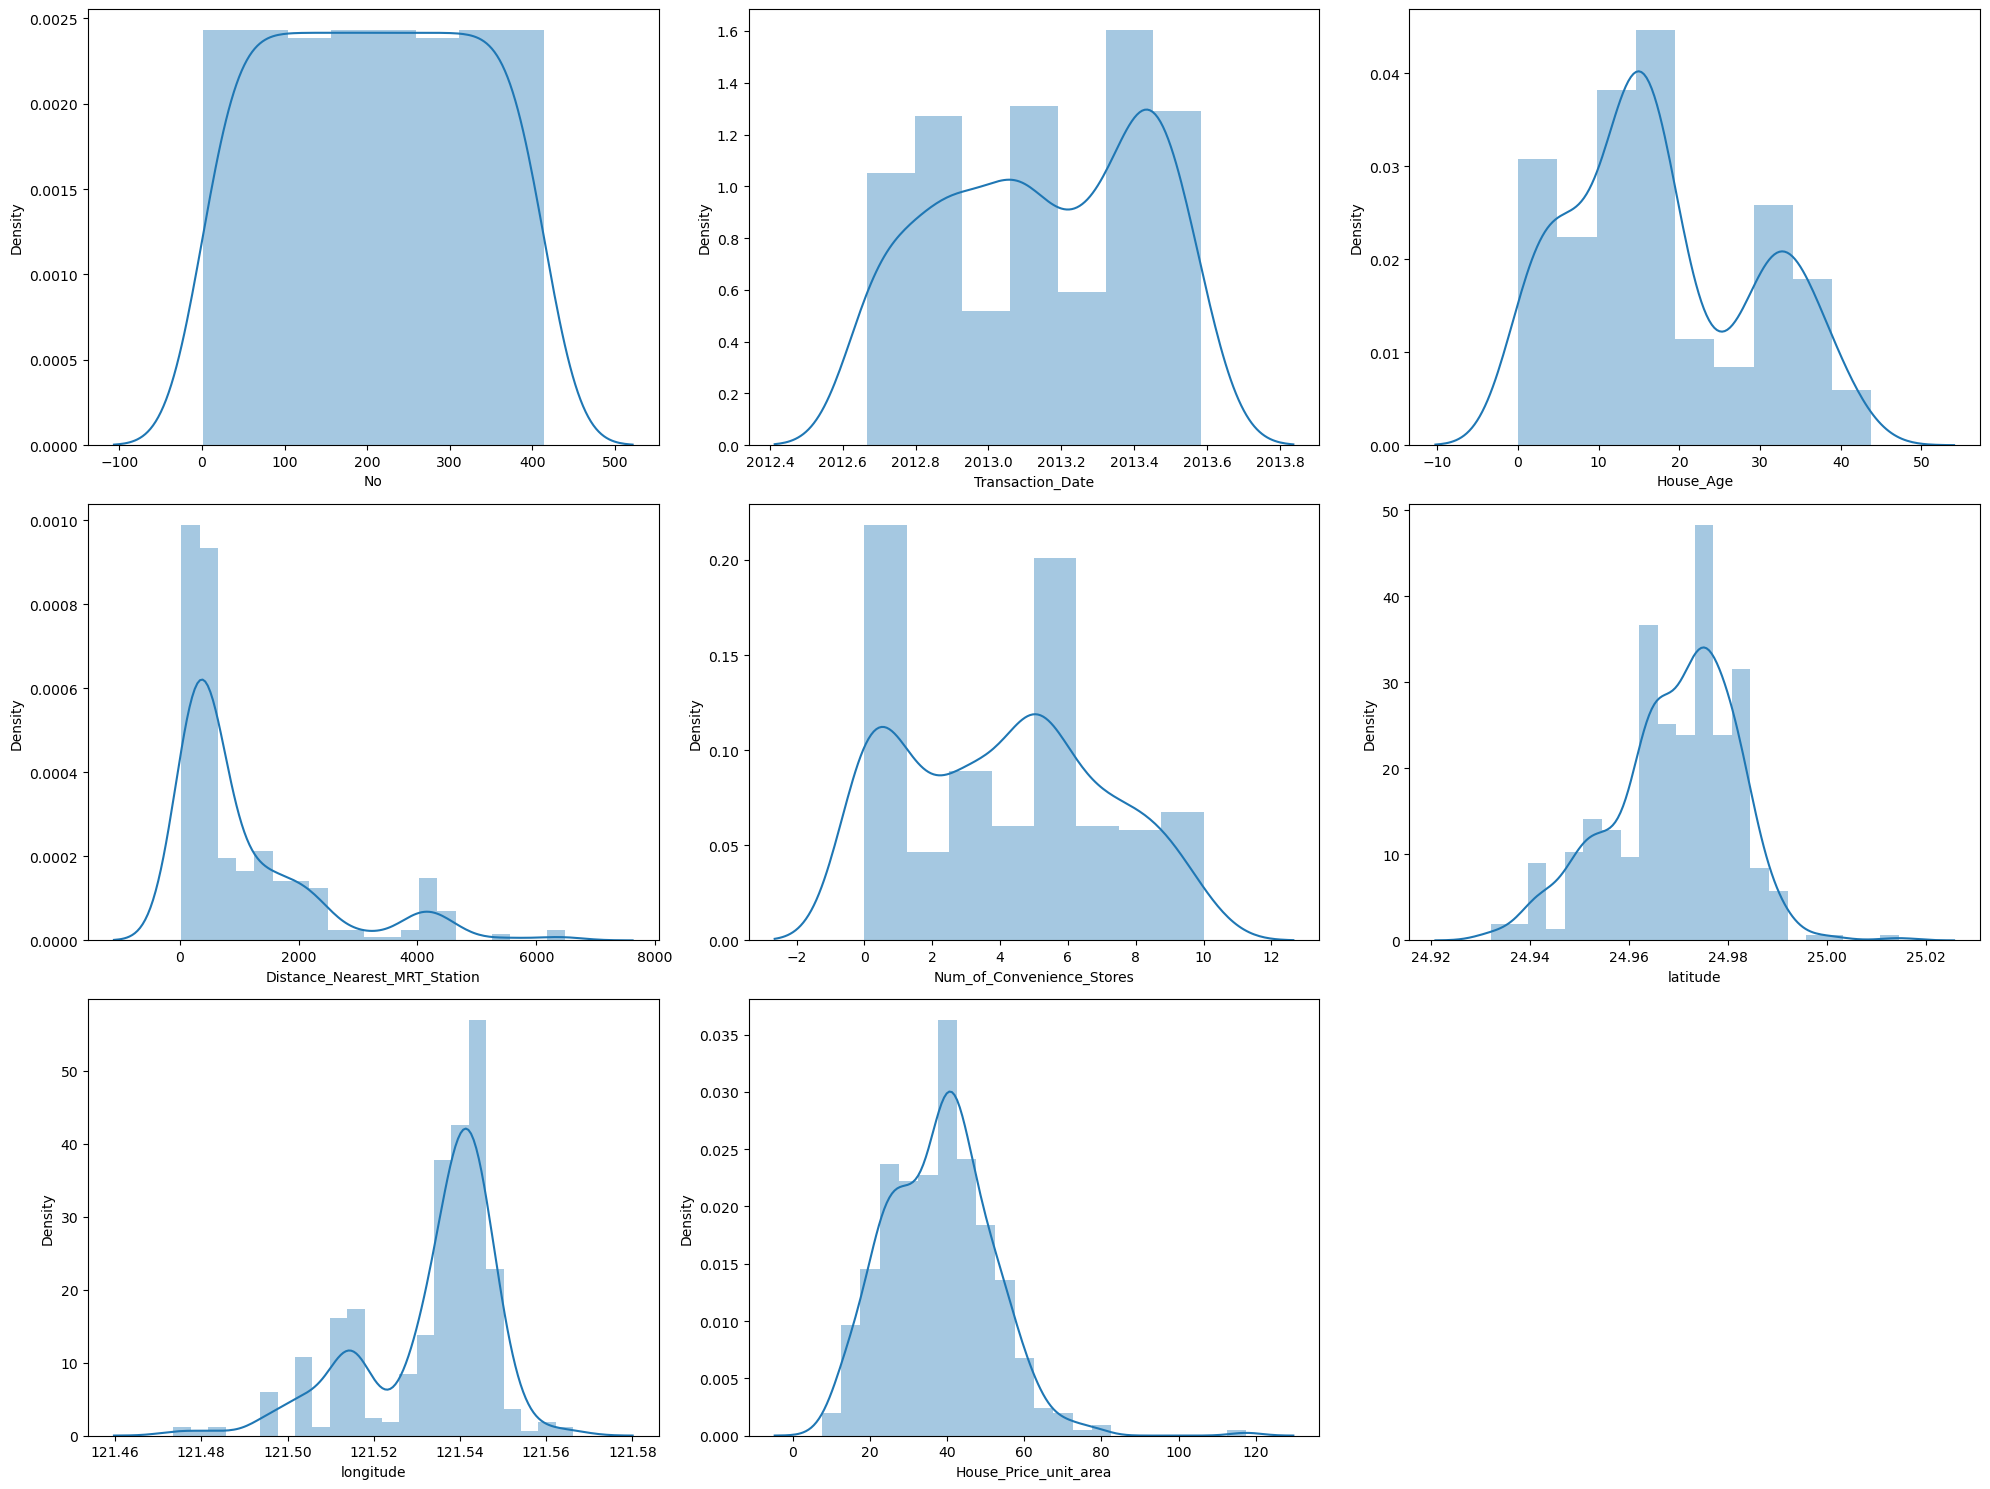

In [10]:
# check the data distribution using distplot for all the columns
plt.figure(figsize=(20,15))
graph=1
for column in d:
    if graph <=8:
        ax=plt.subplot(3,3,graph)
        sns.distplot(d[column])
        plt.xlabel(column)
    graph +=1
plt.tight_layout()

* From the above plot Distance_Nearest_MRT_Station is right skewed.
* Latitude and longitude to be scaled.
* Other features fairly normally distributed.

In [11]:
#change transaction date value to proper date format
import math
import datetime
for i in range (len(d)):
    frac,whole = math.modf(d['Transaction_Date'][i])
    sd12 = datetime.datetime.strptime('12/31/11',"%m/%d/%y")
    sd13 = datetime.datetime.strptime('12/31/11',"%m/%d/%y")
    if whole==12:
        d.loc[i,'Transaction_Date']=(sd12+datetime.timedelta(days=frac*366)).date()
    else:
        d.loc[i,'Transaction_Date']=(sd13+datetime.timedelta(days=frac*366)).date()

<Axes: ylabel='Transaction_Date'>

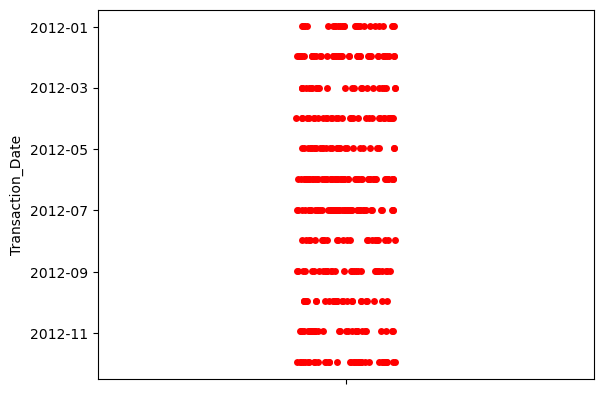

In [12]:
sns.stripplot(d['Transaction_Date'], color='r')

In [13]:
d['Transaction_Date'].value_counts()

Transaction_Date
2012-05-31    58
2012-07-01    47
2012-01-30    46
2012-11-30    38
2012-03-31    32
2012-10-30    31
2012-08-31    30
2012-04-30    29
2011-12-31    28
2012-09-30    27
2012-03-01    25
2012-07-31    23
Name: count, dtype: int64

##### Dates treated in proper format and Dropping No. feature because it does not help in analysis.

In [14]:
#Dropping the No. feature
d.drop(columns=['No'],inplace=True)

In [15]:
d.head()

,Transaction_Date,House_Age,Distance_Nearest_MRT_Station,Num_of_Convenience_Stores,latitude,longitude,House_Price_unit_area
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
2,2012-07-31,13.3,561.98450,5,24.98746,121.54391,47.3
3,2012-07-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-30,5.0,390.56840,5,24.97937,121.54245,43.1


#### 2. Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least three performance metrics).


In [16]:
X=d.drop(columns=['Transaction_Date','House_Price_unit_area'])
y=d['House_Price_unit_area']

* Splitted the dataset into X and y 
* X has features except Transaction_Date,House_Price_unit_area.
* y has target feature House_Price_unit_area.

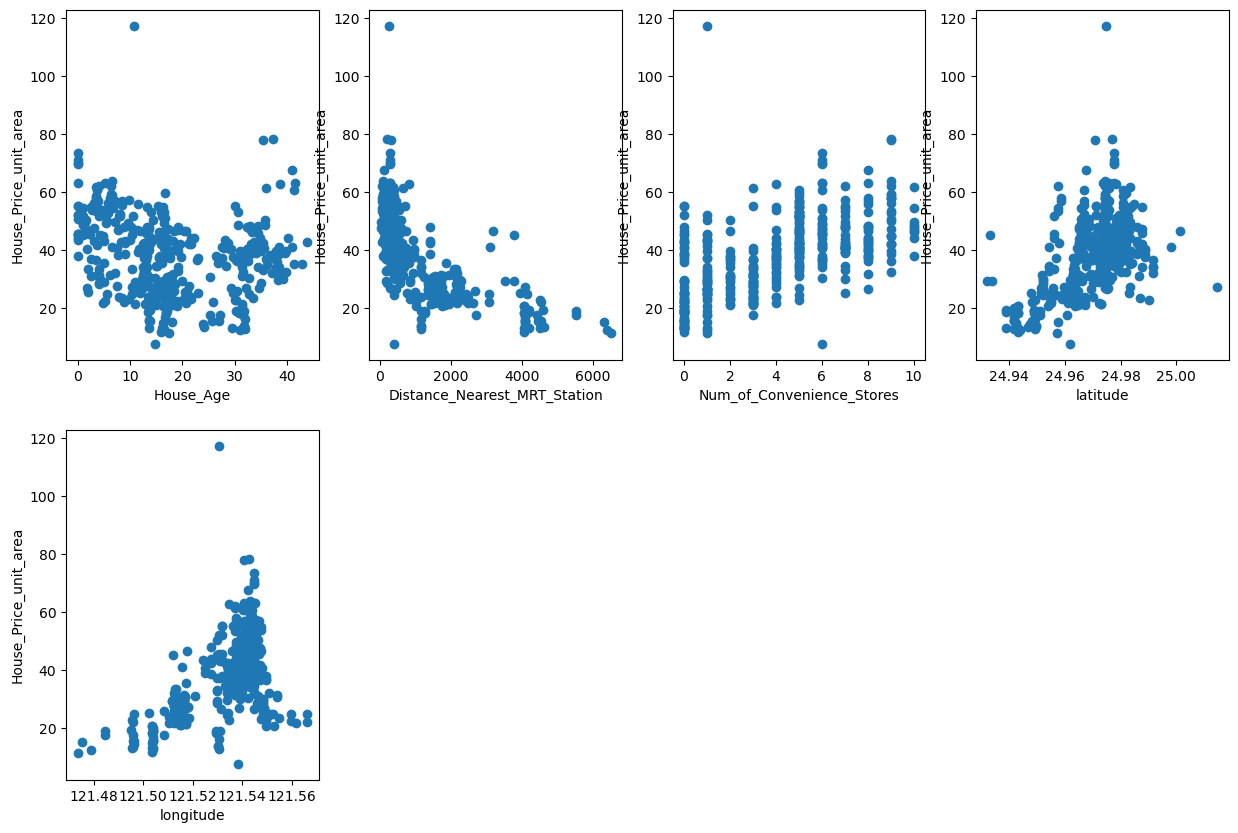

In [17]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in X:
    if plotnumber <=6:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('House_Price_unit_area',fontsize=10)
    plotnumber +=1
plt.show()

* Distance nearest MRT station has negative correlation where house price unit area decreases when distance increases.

In [18]:
#Data Scaling
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[ 1.25562833, -0.79249504,  2.00740743,  1.12542986,  0.44876222],
       [ 0.15708622, -0.61661163,  1.66750286,  0.91244418,  0.40113894],
       [-0.38779067, -0.41401527,  0.30788458,  1.48686011,  0.68818339],
       ...,
       [ 0.09556786, -0.54967846,  0.98769372,  0.82289338,  0.42397202],
       [-0.84478419, -0.77668389,  0.30788458, -0.18475479,  0.4768143 ],
       [-0.98539758, -0.78807071,  1.66750286,  0.42757905,  0.63534112]])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=348)
y_train.head()

7      46.7
61     63.2
284    34.4
241    41.4
102    54.4
Name: House_Price_unit_area, dtype: float64

In [21]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
#Predict the house price unit area
d.tail(2)

,Transaction_Date,House_Age,Distance_Nearest_MRT_Station,Num_of_Convenience_Stores,latitude,longitude,House_Price_unit_area
412,2011-12-31,8.1,104.81010,5,24.96674,121.54067,52.5
413,2012-07-01,6.5,90.45606,9,24.97433,121.54310,63.9


In [23]:
print("House Price unit area is : ",regression.predict(scaler.transform([[6.5,90.45606,9,24.97433,121.54310]])))

House Price unit area is :  [52.69384402]


In [24]:
scaler.transform([[6.5,90.45606,9,24.97433,121.54310]])

array([[-0.98539758, -0.78807071,  1.66750286,  0.42757905,  0.63534112]])

In [25]:
regression.score(X_train,y_train)

0.6082268252776746

In [26]:
#check how well model fits the test data
regression.score(X_test,y_test)

0.47577441433091705

In [27]:
y_pred =(regression.predict(X_test))
y_pred

array([46.07492546, 35.71935703, 47.63400865, 42.28731459, 40.06477791,
       25.71678486, 36.96250967, 31.16030173, 45.64829758, 37.46044301,
       46.19364528, 29.12187699, 30.41210814, 25.49078673,  8.85423031,
       34.78189627, 38.44369313, 46.18547718, 32.49185509, 38.80398718,
       41.72517232, 45.09402943, 44.98769693, 45.09402943, 49.92764625,
       48.4508444 , 44.65173149, 31.12075037, 45.03481386, 52.87149073,
       52.59762533, 34.14981363, 42.53483909, 47.84459097, 44.71197205,
       45.07652028, 32.09740885, 45.64900621, 45.18285278, 30.4267574 ,
       45.153245  , 29.77523106, 34.67674104, 31.65677218, 38.17302974,
       12.72001499, 40.78826524, 39.38562278, 29.82604432, 35.14468204,
       47.32543671, 36.77783769, 36.29887482, 44.92848136, 40.78826524,
       31.93954895, 55.61830131, 45.153245  , 34.75228849, 31.64107403,
       52.59762533, 34.87344373, 45.05841298, 30.00276717, 38.32620462,
       32.84428162, 43.90827711, 31.32109862, 43.69836329, 45.58

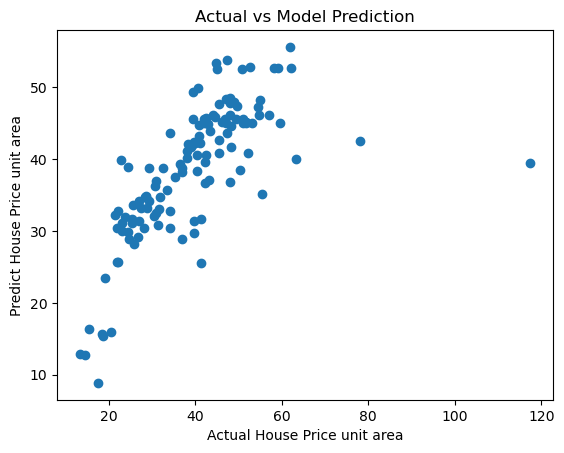

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual House Price unit area')
plt.ylabel('Predict House Price unit area')
plt.title('Actual vs Model Prediction')
plt.show()

* The above plot shows better results the model is not overfitted. 

In [29]:
#Check the error with MAE, MSE
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,make_scorer

In [30]:
#MAE
mae = mean_absolute_error(y_test,y_pred)

In [31]:
#MSE
mse = mean_squared_error(y_test,y_pred)

In [32]:
#r2 score
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 103.53486317568623
Mean Absolute Error (MAE): 6.160993255436426
R-squared (R2): 0.47577441433091705


* MSE and MAE error is quite large value,
* R3 score has 47% accuaracy.

#### 3. Continue from question 2, use leave-one-out validation and five fold cross validation and report the model performance. Compare the three evaluation methods and suggest which one is more reliable.

In [34]:
#Importing LeaveOneOut, Cross Validation Score, KFold
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold

In [35]:
# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
model = LinearRegression()

scoring = {'mse': make_scorer(mean_squared_error),
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

# Cross-validate using LOO-CV
mse_scores = cross_val_score(model, X_scaled, y, cv=loo, scoring=scoring['mse'])
loo_mse = np.mean(mse_scores)

mae_scores = cross_val_score(model, X_scaled, y, cv=loo, scoring=scoring['mae'])
loo_mae = np.mean(mae_scores)

r2_scores = cross_val_score(model, X_scaled, y, cv=loo, scoring=scoring['r2'])
loo_r2 = np.mean(r2_scores)

print(f"\nLeave-One-Out Cross-Validation (LOO-CV):")
print(f"Mean Squared Error (MSE): {loo_mse}")
print(f"Mean Absolute Error (MAE): {loo_mae}")



Leave-One-Out Cross-Validation (LOO-CV):
Mean Squared Error (MSE): 81.68169281258606
Mean Absolute Error (MAE): 6.268753839427232


In [36]:
# Five-Fold Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = LinearRegression()

# Cross-validate using 5-Fold CV
kf_mse_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=scoring['mse'])
kf_mse = np.mean(kf_mse_scores)

kf_mae_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=scoring['mae'])
kf_mae = np.mean(kf_mae_scores)

kf_r2_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=scoring['r2'])
kf_r2 = np.mean(kf_r2_scores)

print(f"\nFive-Fold Cross-Validation (5-Fold CV):")
print(f"Mean Squared Error (MSE): {kf_mse}")
print(f"Mean Absolute Error (MAE): {kf_mae}")
print(f"R-squared (R2): {kf_r2}")



Five-Fold Cross-Validation (5-Fold CV):
Mean Squared Error (MSE): 81.40057619155372
Mean Absolute Error (MAE): 6.264717048770627
R-squared (R2): 0.5562351639669746


In [37]:
print(f"\nComparison of Evaluation Methods:")
print(f"Method\t\t\t\tMSE\t\t\t\tMAE\t\t\t\tR2")
print(f"Train-Test Split\t\t{mse}\t\t{mae}\t\t{r2}")
print(f"Leave-One-Out CV\t{loo_mse}\t\t{loo_mae}\t\t{loo_r2}")
print(f"Five-Fold CV\t\t{kf_mse}\t\t{kf_mae}\t\t{kf_r2}")


Comparison of Evaluation Methods:
Method				MSE				MAE				R2
Train-Test Split		103.53486317568623		6.160993255436426		0.47577441433091705
Leave-One-Out CV	81.68169281258606		6.268753839427232		nan
Five-Fold CV		81.40057619155372		6.264717048770627		0.5562351639669746


* From the observation Leave-One-Out CV and Five-Fold CV's MSE and Mae error is reduced.
* Five-Fold CV performed better in over all performance.

#### 4. Continue from question 2, apply L1 and L2 regularization on the linear regression model developed using the same training set. Compare the performance and indicate key findings.

In [38]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100)

In [39]:
alpha=lasscv.alpha_
alpha

0.15471360875009785

In [40]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.15471360875009785)

In [41]:
lasso_reg.score(X_test,y_test)

0.47659938029510396

In [42]:
# Ridge will return best alpha

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [43]:
ridgecv.alpha_

0.09099999999999998

In [44]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [45]:
ridge_model.score(X_test,y_test)

0.47575999744325603

* Compare to Lasso and Ridge both performed similar performance of R2 Score.

## REFERENCES.

1) “UCI Machine Learning Repository,” archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

2) I-Cheng. Yeh and T.-K. Hsu, “Building real estate valuation models with comparative approach through case-based reasoning,” Applied Soft Computing, vol. 65, pp. 260–271, Apr. 2018, doi: https://doi.org/10.1016/j.asoc.2018.01.029.